# Importar livrarias e carregar dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path = 'case_8_games_test_masked.csv'
df_original = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

### Perform EDA to gain insights into the dataset and understand its characteristics. 

In [ ]:
# Verify first 5 observations
df_original.info()

In [ ]:
# checks the dimensions of the dataset
df_original.shape

In [ ]:
# Verify unique values in variables
qtde_columns = len(df_original.columns)
valores_unicos = []
for i in df_original.columns[0:qtde_columns].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))  

In [ ]:
# Remove unnecessary variables
df_original = df_original.drop("dummy", axis=1)

In [ ]:
# Transform objects fields in DateTime
df_original['date'] = pd.to_datetime(df_original['date'], format='%d/%m/%Y', errors='coerce')
df_original['original'] = pd.to_datetime(df_original['original'], format='%d/%m/%Y', errors='coerce')

In [ ]:
# Checks the percentage of missing values ​​in each variable
missing_vales_order = df_original.isna().sum().sort_values(ascending = False)
missing_percentages=missing_vales_order/len(df_original)
missing_percentages[missing_percentages!=0]

# Print null values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [ ]:
# Fill missing values for 'price', 'metascore', 'userscore', 'positive', 'negative' with the median of their columns
# MEDIANA
df_original['price'].fillna(df_original['price'].median(), inplace=True)
df_original['metascore'].fillna(df_original['metascore'].median(), inplace=True)
df_original['userscore'].fillna(df_original['userscore'].median(), inplace=True)
df_original['positive'].fillna(df_original['positive'].median(), inplace=True)
df_original['negative'].fillna(df_original['negative'].median(), inplace=True)

# Analyze numerical and categorical variables using appropriate plots such as bar charts, pie charts, or frequency distributions.

C:\Users\cnazareth\AppData\Local\Temp\ipykernel_10844\386347837.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_time_per_day.index, y=average_time_per_day.values, palette='viridis')


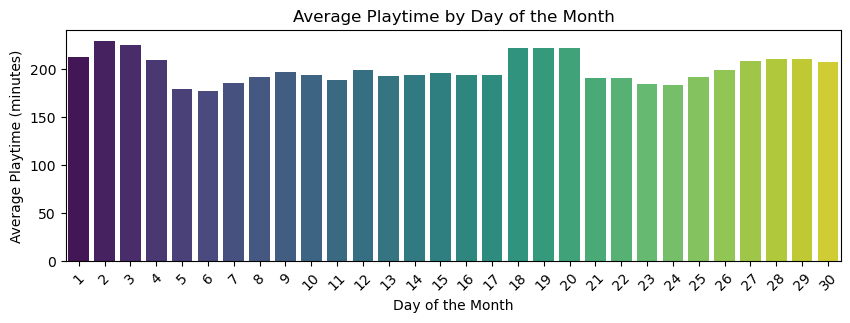

C:\Users\cnazareth\AppData\Local\Temp\ipykernel_10844\386347837.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=players_per_day.index, y=players_per_day.values, palette='viridis')


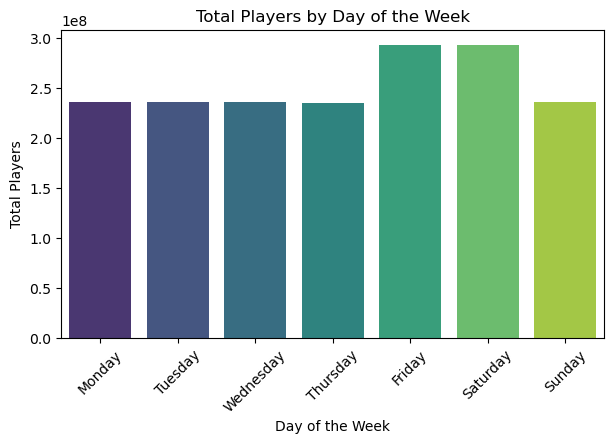

In [70]:
# The objective is to predict the average playtime per day

df_original['day_of_month'] = df_original['date'].dt.day

# Agrupar por dia do mês e calcular a média dos minutos de jogo
average_time_per_day = df_original.groupby('day_of_month')['average'].mean()  # Use .median() para mediana

# Plotar os dados
plt.figure(figsize=(10, 3))
sns.barplot(x=average_time_per_day.index, y=average_time_per_day.values, palette='viridis')
plt.title('Average Playtime by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Conduct correlation analysis to identify relationships between variables. Visualize the correlations using heatmaps or scatter plots.

C:\Users\cnazareth\AppData\Local\Temp\ipykernel_10844\2226627891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='viridis')


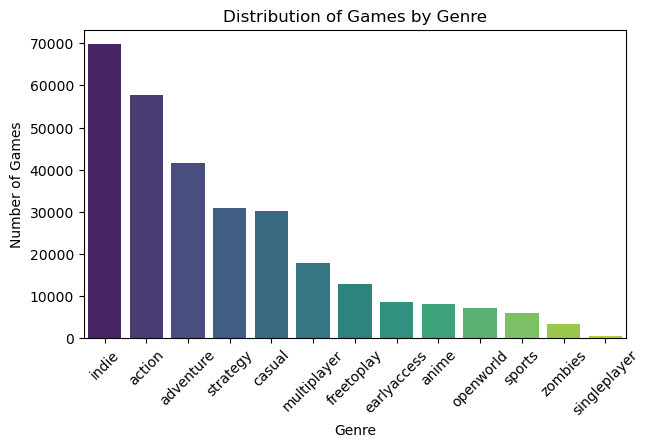

In [71]:
# Genre and Publisher Distribution
genre_columns = ['action', 'adventure', 'anime', 'casual', 'earlyaccess', 'freetoplay', 'indie', 'multiplayer', 'openworld', 'singleplayer', 'sports', 'strategy', 'zombies']

# Count of games by genre
genre_distribution = df_original[genre_columns].sum().sort_values(ascending=False)

# Plotting Genre Distribution
plt.figure(figsize=(7, 4))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='viridis')
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

C:\Users\cnazareth\AppData\Local\Temp\ipykernel_10844\672697307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_distribution.index, y=publisher_distribution.values, palette='viridis')


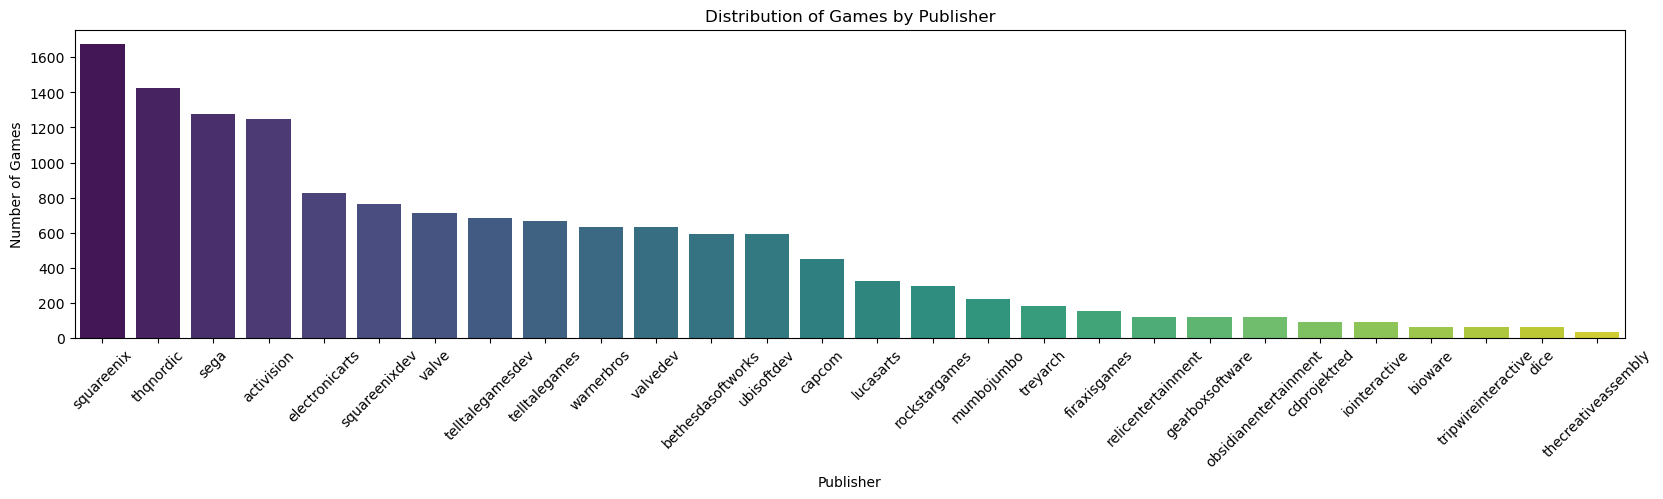

In [72]:
# Plotting Publisher Distribution
publisher_columns = ['activision', 'bethesdasoftworks', 'electronicarts', 'rockstargames', 'sega', 'squareenix', 'thqnordic', 'telltalegames', 'valve', 'warnerbros', 'bioware', 'capcom', 'cdprojektred', 'dice', 'firaxisgames', 'gearboxsoftware', 'iointeractive', 'lucasarts', 'mumbojumbo', 'obsidianentertainment', 'relicentertainment', 'squareenixdev', 'telltalegamesdev', 'thecreativeassembly', 'treyarch', 'tripwireinteractive', 'ubisoftdev', 'valvedev']

# Count of games by publisher
publisher_distribution = df_original[publisher_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 4))
sns.barplot(x=publisher_distribution.index, y=publisher_distribution.values, palette='viridis')
plt.title('Distribution of Games by Publisher')
plt.xticks(rotation=45)
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.show()

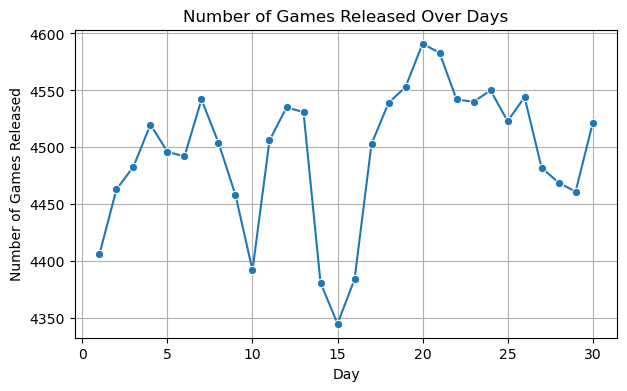

In [64]:
# Analisar a tendência ao longo dos meses
df_original['day'] = df_original['date'].dt.day
games_per_day = df_original['day'].value_counts().sort_index()

# Plotar a tendência de lançamento de jogos ao longo dos meses
plt.figure(figsize=(7, 4))
sns.lineplot(x=games_per_day.index, y=games_per_day.values, marker='o')
plt.title('Number of Games Released Over Days')
plt.xlabel('Day')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

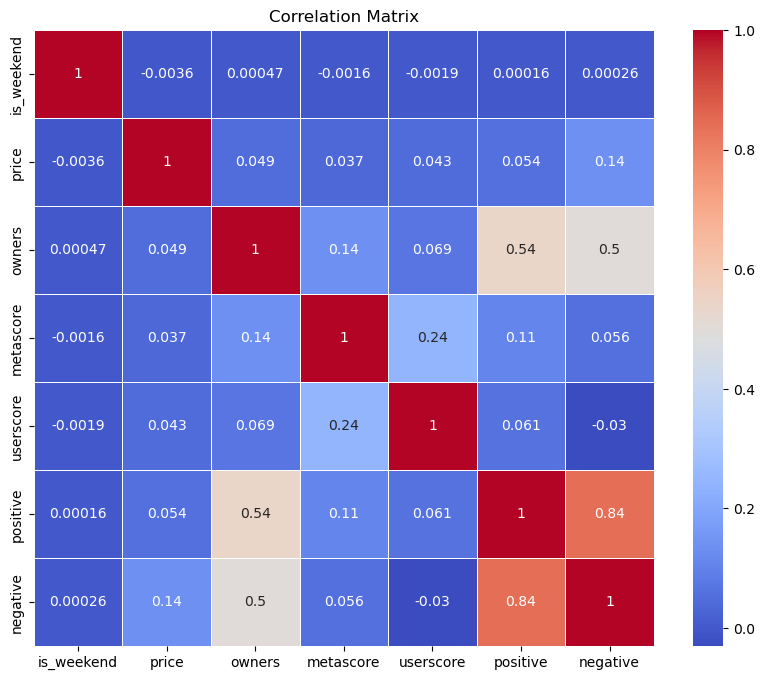

In [65]:
# Correlation Analysis
correlation_matrix = df_original[['is_weekend', 'price', 'owners', 'metascore', 'userscore', 'positive', 'negative']].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Treinar e avaliar o modelo - TESTE 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = 'case_8_games_test_masked.csv'
data = pd.read_csv(file_path)

# Data Cleaning
if 'average' in data.columns:
    data_cleaned = data.drop(columns=['average'])
else:
    data_cleaned = data.copy()

data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], format='%d/%m/%Y', errors='coerce')

columns_to_fill = ['mediantime', 'players', 'price', 'metascore', 'userscore', 'positive', 'negative']
for column in columns_to_fill:
    if column in data_cleaned.columns:
        data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)



correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Prepare Data for Modeling
features = ['day', 'month', 'weekday', 'is_weekend', 'players', 'price', 'metascore', 'userscore', 'positive', 'negative']
target = 'mediantime'

X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse


# Treinar e avaliar o modelo - Teste 2

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#  Erro Médio Absoluto (RMSE é mais sensível a outliers)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, rmse